# MAIN

In [1]:
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

sys.path.insert(0, './modelling')
sys.path.insert(0, './configuration')

from configuration.Feature_Indices import ensemble_index, logit_index
from modelling.model import Model, TransferModel
from modelling.explanation import Shap
from modelling.prediction import Prediction
from modelling.functions import get_key_values_where_index_is_in_both_dataframes
from modelling.ml import ML


import warnings
warnings.filterwarnings(action="ignore")
plt.style.use({'figure.facecolor':'white'})
shap.initjs()

In [2]:
# Set configuration. Without it, nothing will work.
ML.set_configuration(path_to_config_file='./configuration/config.ini')

### I. ORIGINAL MODEL

##### A. Create instances of class "Model"

In [3]:
random_forest_model = Model()       # For: RandomForest
logit_model = Model()               # For: LogisticRegression
xgb_model = Model()                 # For: XGBClassifier

##### B. Load data to train models

In [4]:
random_forest_model.load_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
logit_model.load_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
xgb_model.load_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')

##### C. Set key, target and features
###### Note: The Original Model needs a SECOND KEY because the first key ('orig_key_1') is not unique in the training model data set. For the explanation object, the combination of "key" and "second_key" makes a row unique and thus allows to index the dataframe.

In [5]:
random_forest_model.set_key_target_features(key='orig_key_1',target='orig_target', features=ensemble_index, features_excluded_in_training=['orig_key_1', 'orig_key_3', 'orig_key_2'], second_key='orig_key_2')
logit_model.set_key_target_features(key='orig_key_1',target='orig_target', features=logit_index, features_excluded_in_training=['orig_key_1', 'orig_key_3', 'orig_key_2'], second_key='orig_key_2')
xgb_model.set_key_target_features(key='orig_key_1',target='orig_target', features=ensemble_index, features_excluded_in_training=['orig_key_1', 'orig_key_3', 'orig_key_2'], second_key='orig_key_2')

##### D. Train-Test-split of dataset
###### Note: Split along group "orig_key_3" for cross validation in order to avoid data leakage

In [6]:
random_forest_model.train_test_split_dataframe(group='orig_key_3')
logit_model.train_test_split_dataframe(group='orig_key_3')
xgb_model.train_test_split_dataframe(group='orig_key_3')

##### E. Select estimators and hyperparameters (reference in the config.ini)

In [7]:
est1 = RandomForestClassifier()
params_name1 = 'rfc'
random_forest_model.set_estimator_and_parameters(unfitted_estimator=est1, hyper_params_dict_name_in_config=params_name1)

In [8]:
est2 = LogisticRegression()
params_name2 = 'logit'
logit_model.set_estimator_and_parameters(unfitted_estimator=est2, hyper_params_dict_name_in_config=params_name2)

In [9]:
est3 = XGBClassifier()
params_name3 = 'xgb'
xgb_model.set_estimator_and_parameters(unfitted_estimator=est3, hyper_params_dict_name_in_config=params_name3)

##### F. Train model and cross validate

In [10]:
random_forest_model.train_model_and_cross_validate()
logit_model.train_model_and_cross_validate()
xgb_model.train_model_and_cross_validate()

###### Note: Trained estimators can be saved, if desired:

In [11]:
random_forest_model.save_fitted_estimator(config_section='Original.Model.Models', config_name='rfc')
logit_model.save_fitted_estimator(config_section='Original.Model.Models', config_name='logit')
xgb_model.save_fitted_estimator(config_section='Original.Model.Models', config_name='xgb')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Models/rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Models/logit.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Models/xgb.joblib !


###### Note: Also, dataframes could be saved if desired (i.e. if they were altered):

In [12]:
random_forest_model.save_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
logit_model.save_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')
xgb_model.save_dataframe(config_section='Original.Model.Training', config_name='learn_data_preprocessed')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Training/orig_learn_data_preprocessed.zip !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Training/orig_learn_data_preprocessed.zip !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Training/orig_learn_data_preprocessed.zip !


##### G. Get training results for train-set and cv-sets (cv-train and cv-test -> part of train set)

In [13]:
random_forest_model.get_cv_results()

,0
mean_fit_time,0.7896
std_fit_time,0.039412
mean_score_time,0.031795
std_score_time,0.002706
param_bootstrap,True
param_ccp_alpha,0.0
param_class_weight,None
param_criterion,gini
param_max_depth,None
param_max_features,log2


In [14]:
logit_model.get_cv_results()

,0
mean_fit_time,0.167428
std_fit_time,0.007852
mean_score_time,0.008397
std_score_time,0.002333
param_estimator__C,0.1
param_estimator__class_weight,None
param_estimator__dual,False
param_estimator__fit_intercept,True
param_estimator__intercept_scaling,1
param_estimator__l1_ratio,None


In [15]:
xgb_model.get_cv_results()

,0
mean_fit_time,0.884694
std_fit_time,0.462145
mean_score_time,0.015201
std_score_time,0.008134
param_base_score,None
param_booster,None
param_colsample_bylevel,None
param_colsample_bynode,None
param_colsample_bytree,None
param_gamma,None


##### H. Get roc_auc for test set (to validate chosen model)

In [16]:
random_forest_model.get_test_set_roc_auc_score()

0.9716462293785048

In [17]:
logit_model.get_test_set_roc_auc_score()

0.936889088767193

In [18]:
xgb_model.get_test_set_roc_auc_score()

0.9067839430357115

### II. FEATURE CONTRIBUTION / SHAP VALUES

##### A. First, create an ExplanationInput-object from the respective (original) model (from above).

In [19]:
random_forest_model.generate_explanation_input()
xgb_model.generate_explanation_input()

###### You could save the explanation_input_object if desired

In [20]:
random_forest_model.save_explanation_input_object(config_section='Original.Model.Explanation', config_name='explanation_input_object', model_type='RFC')
xgb_model.save_explanation_input_object(config_section='Original.Model.Explanation', config_name='explanation_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Explanation/explanation_input_object_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Explanation/explanation_input_object_xgb.joblib !


##### B. The explanation_input_object is the input to a new instance of class Shap (a subclass of class Explanation)

In [21]:
# Load the explanation_input_object before if it is not in memory and if it was saved before
if not random_forest_model.explanation_input_object:
    random_forest_model.load_explanation_input_object(config_section='Original.Model.Training', config_name='explanation_input', model_type='ensemble')
if not xgb_model.explanation_input_object:
    xgb_model.load_explanation_input_object(config_section='Original.Model.Training', config_name='explanation_input', model_type='ensemble')

In [22]:
expl_random_forest = Shap(explanation_input=random_forest_model.explanation_input_object)

In [23]:
expl_xgb = Shap(explanation_input=xgb_model.explanation_input_object)

##### C. Create the required SHAP-objects (explainer and explanation objects).
###### CAUTION: This might take a while depending on your setup and dataset. With the provided dataset, this takes around 4 min on my (old) machine.

In [24]:
expl_random_forest.create_shap_objects()

100%|===================| 19670/19676 [03:25<00:00]        

In [25]:
expl_xgb.create_shap_objects()

 98%|===================| 9675/9830 [00:48<00:00]        

##### D. Calculate the global explanation object

In [26]:
expl_random_forest.calc_global_explanation()

In [27]:
expl_xgb.calc_global_explanation()

##### E. Now, feature contributions can be plotted

###### GLOBAL PLOTS (Aggregates for the entire dataset)

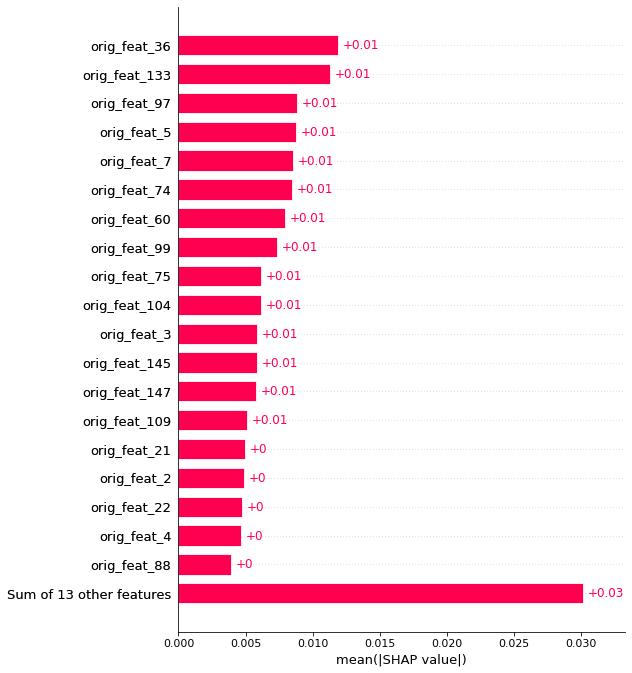

In [28]:
expl_random_forest.plot_global_bars(num_feat_shown=20)

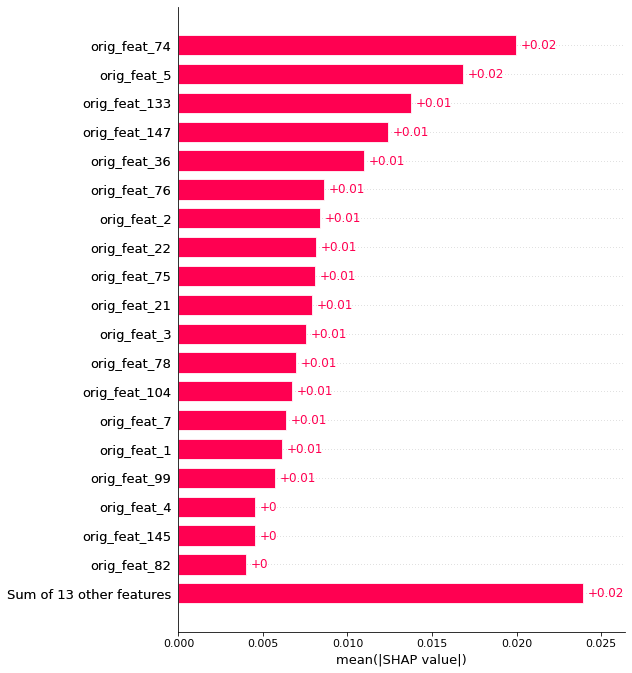

In [29]:
expl_xgb.plot_global_bars(num_feat_shown=20)

###### Note: The global heatmap plot is computationally expensive and takes quite some time if the data set is big. Consider omitting it:

In [30]:
# expl_random_forest.plot_global_heatmap(num_feat_shown=20)

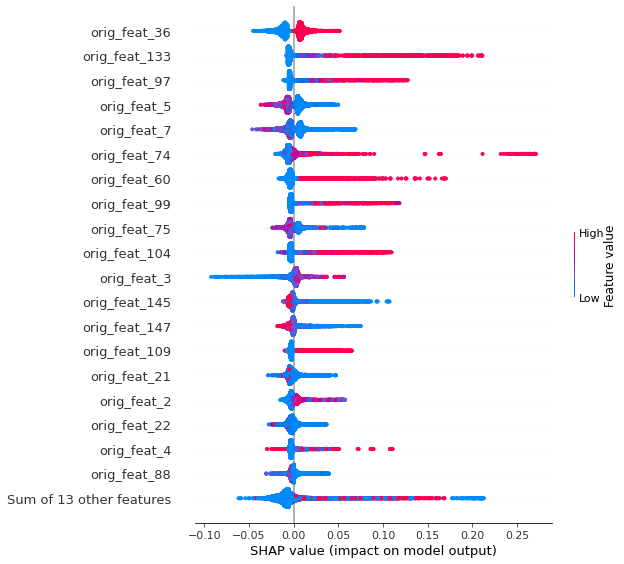

In [31]:
expl_random_forest.plot_global_beeswarm(num_feat_shown=20)

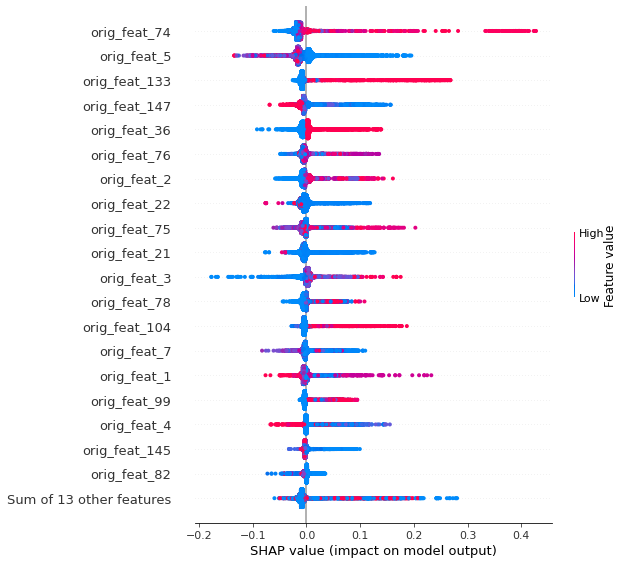

In [32]:
expl_xgb.plot_global_beeswarm(num_feat_shown=20)

###### LOCAL PLOTS (For individual data points)

###### Note: Choose a data row. The data row and their key values (key: 'orig_key_1') must be in the chosen shap_data_for_explanation data set (see section [Model.Explanation] in the config.ini). For the Original Model Shaps, we also need the second_key_val (here 'orig_key_2') as the 'orig_key_1' alone is not unique in that data set.

In [33]:
# RandomForest
key_list_1 = get_key_values_where_index_is_in_both_dataframes(df_one=random_forest_model.X ,df_two=expl_random_forest.shap_explanation_data, key_in_df_one='orig_key_1', second_key_in_df_one='orig_key_2')
kv1, skv1 = key_list_1[0]

# XGB
key_list_3 = get_key_values_where_index_is_in_both_dataframes(df_one=xgb_model.X ,df_two=expl_xgb.shap_explanation_data, key_in_df_one='orig_key_1', second_key_in_df_one='orig_key_2')
kv3, skv3 = key_list_3[0]

###### Note: Check whether the chosen single data row is in the respective shap explanation data sets. shap_explanation_data contains the reduced data set (reduced to size "max_num_explanation_data_rows" in the config.ini). shap_explanation_data_all contains the entire data set chosen (like "train" or "test" or "monthly")

In [34]:
expl_random_forest.get_info_about_key_vals(key_value=kv1, second_key_value=skv1)

INFO: The orig_key_1 = k1_val93 with orig_key_2 = 201012 IS in the shap_explanation_data (reduced data set) and IS in the shap_explanation_data_all !


In [35]:
expl_xgb.get_info_about_key_vals(key_value=kv3, second_key_value=skv3)

INFO: The orig_key_1 = k1_val93 with orig_key_2 = 201012 IS in the shap_explanation_data (reduced data set) and IS in the shap_explanation_data_all !


###### The local_shap_values_from_method (calculated with the data in: shap_explanation_data_all (the entire data set)):

In [36]:
expl_random_forest.get_local_shap_values_from_method(key_value=kv1, second_key_value=skv1)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
1,-0.004265,0.011883,-0.002697,-0.012059,-0.006697,-0.003225,0.009885,-0.001719,-0.004587,-0.001906,...,-0.0017,-0.002725,-0.000855,0.00521,0.00257,-0.001083,0.00085,-0.001171,-0.004553,-0.00022


In [37]:
expl_xgb.get_local_shap_values_from_method(key_value=kv3, second_key_value=skv3)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
1,-0.00695,0.00186,-0.003879,-0.004222,-0.021446,-0.001258,0.002589,0.00003,-0.003367,-0.00291,...,-0.001109,-0.001767,0.000208,-0.005005,0.000021,-0.00089,-0.002993,0.000538,-0.000902,-0.000015


###### The local_shap_values_from_global, drawn from the global_shap_explanation object based on the shap_explanation_data (the reduced data set):

In [38]:
expl_random_forest.get_local_shap_values_from_global(key_value=kv1, second_key_value=skv1)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
1,-0.004265,0.011883,-0.002697,-0.012059,-0.006697,-0.003225,0.009885,-0.001719,-0.004587,-0.001906,...,-0.0017,-0.005805,-0.000855,0.00521,0.00257,-0.001083,0.00085,-0.001171,-0.004553,-0.00022


In [39]:
expl_xgb.get_local_shap_values_from_global(key_value=kv3, second_key_value=skv3)

,orig_feat_133,orig_feat_36,orig_feat_99,orig_feat_3,orig_feat_74,orig_feat_97,orig_feat_5,orig_feat_109,orig_feat_21,orig_feat_104,...,orig_feat_1,orig_feat_29,orig_feat_98,orig_feat_76,orig_feat_124,orig_feat_47,orig_feat_25,orig_feat_144,orig_feat_155,orig_feat_31
1,-0.00695,0.00186,-0.003879,-0.004222,-0.021446,-0.001258,0.002589,0.00003,-0.003367,-0.00291,...,-0.001109,-0.001767,0.000208,-0.005005,0.000021,-0.00089,-0.002993,0.000538,-0.000902,-0.000015


###### Note: There is an issue with the local shap values as there is a difference between local shap values coming from global and local shap values coming from the method. With the "compare_local_shap_from_global_with_local_shap_from_method()-method", the difference can be shown. The error should be corrected in newer versions of shap.

In [40]:
expl_random_forest.compare_local_shap_from_global_with_local_shap_from_method(key_value=kv1, second_key_value=skv1)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,1
orig_feat_29,0.003081


In [41]:
expl_xgb.compare_local_shap_from_global_with_local_shap_from_method(key_value=kv3, second_key_value=skv3)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,1
orig_feat_60,0.014533


###### PLOTS:

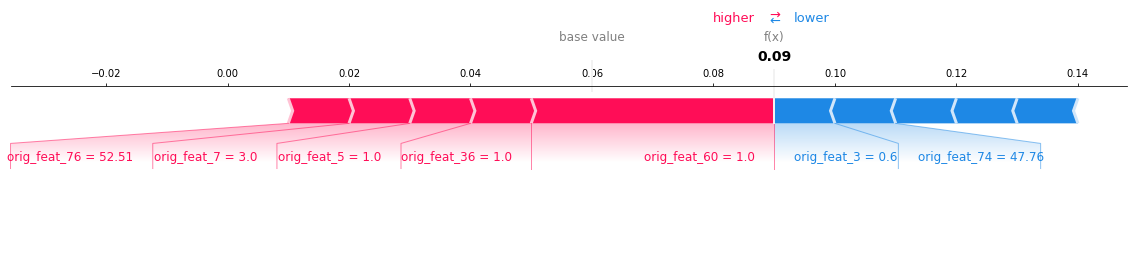

In [42]:
expl_random_forest.plot_local_force(key_value=kv1, second_key_value=skv1)

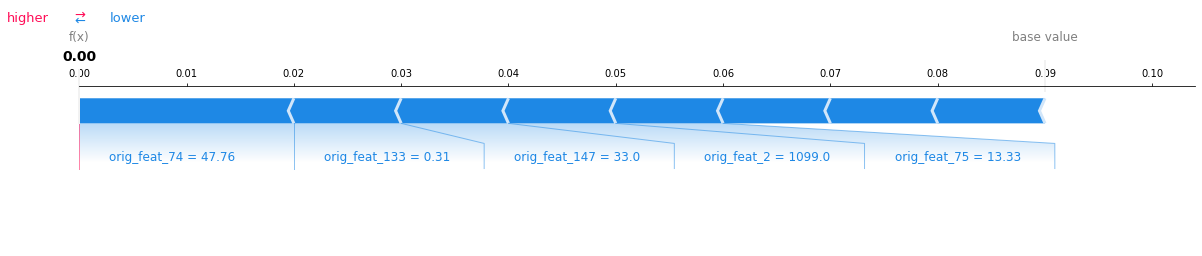

In [43]:
expl_xgb.plot_local_force(key_value=kv3, second_key_value=skv3)

###### Note: The local bar plot is calculated on the basis of the global shap values. The values are NOT correct and the error is shown above with the "compare_local_shap_from_global_with_local_shap_from_method()"-method.

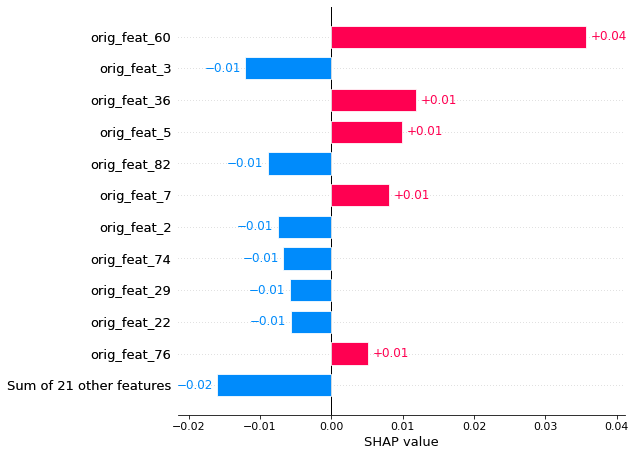

In [44]:
expl_random_forest.plot_local_bars_from_global(key_value=kv1, second_key_value=skv1)

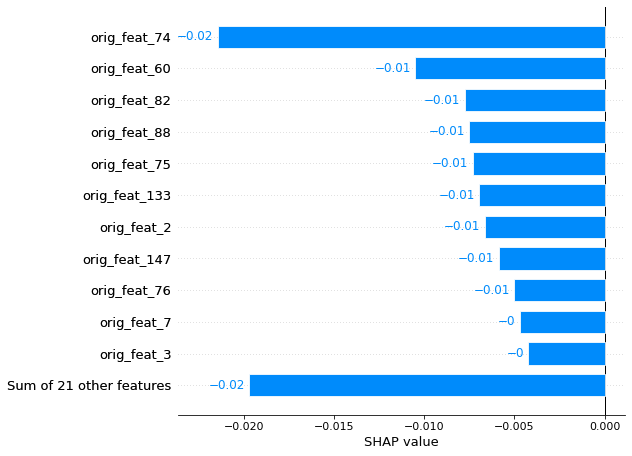

In [45]:
expl_xgb.plot_local_bars_from_global(key_value=kv3, second_key_value=skv3)

###### Note: The local waterfall plot is calculated on the basis of the global shap values. The values are NOT correct and the error is shown above with the "compare_local_shap_from_global_with_local_shap_from_method()"-method.

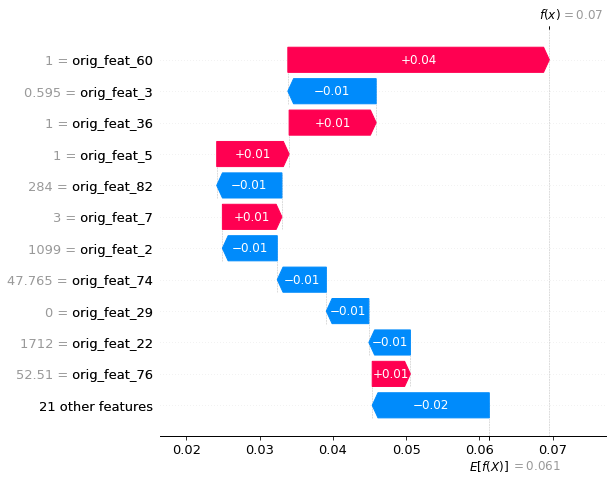

In [46]:
expl_random_forest.plot_local_waterfall_from_global(key_value=kv1, second_key_value=skv1)

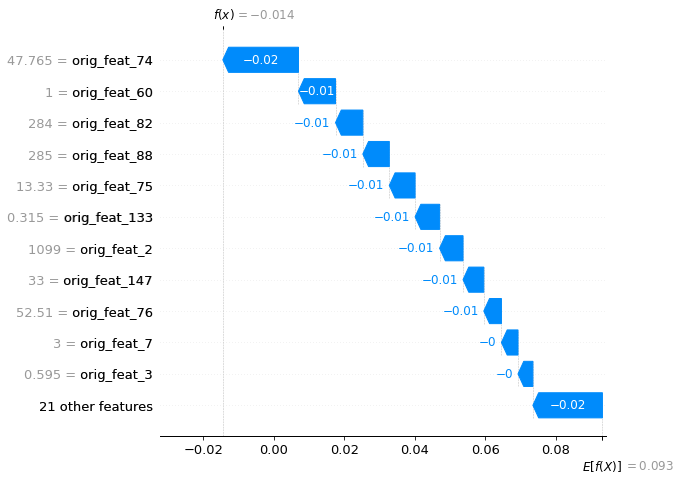

In [47]:
expl_xgb.plot_local_waterfall_from_global(key_value=kv3, second_key_value=skv3)

## III. MAKE PREDICTIONS WITH ORIGINAL MODEL

##### A. Generate prediction input (a namedtuple object: PredictionInput) as input to an "Prediction"-instance

In [48]:
random_forest_model.generate_prediction_input()
logit_model.generate_prediction_input()
xgb_model.generate_prediction_input()

###### You can also save the prediction_input_objects for later usage:

In [49]:
random_forest_model.save_prediction_input_object(config_section='Original.Model.Monthly', config_name='prediction_input_object', model_type='RFC')
logit_model.save_prediction_input_object(config_section='Original.Model.Monthly', config_name='prediction_input_object', model_type='Logit')
xgb_model.save_prediction_input_object(config_section='Original.Model.Monthly', config_name='prediction_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/prediction_input_object_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/prediction_input_object_logit.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/prediction_input_object_xgb.joblib !


##### B. Pass prediction_input_objects to new Prediction-instances for required data and settings:

In [50]:
pred_random_forest = Prediction(random_forest_model.prediction_input_object)

In [51]:
pred_logit = Prediction(logit_model.prediction_input_object)

In [52]:
pred_xgb = Prediction(xgb_model.prediction_input_object)

##### C. Load data

In [53]:
pred_random_forest.load_prediction_dataframe(config_section='Original.Model.Monthly', config_name='data_for_prediction')
pred_logit.load_prediction_dataframe(config_section='Original.Model.Monthly', config_name='data_for_prediction')
pred_xgb.load_prediction_dataframe(config_section='Original.Model.Monthly', config_name='data_for_prediction')

##### D. Load quantile portfolio: One instance is sufficient as the quantile_portfolio is saved at the class level:

In [54]:
pred_random_forest.load_quantile_portfolio(config_section='Original.Model.Monthly', config_name='quantile_portfolio')

##### E. Get the keys (for 'orig_key_1') for the quantile portfolio:

In [55]:
pred_random_forest.set_quantile_keys()
pred_logit.set_quantile_keys()
pred_xgb.set_quantile_keys()

##### F. Finally: Make predictions

In [56]:
pred_random_forest.predict_probas()
pred_logit.predict_probas()
pred_xgb.predict_probas()

In [57]:
pred_random_forest.calculate_quantiles()
pred_logit.calculate_quantiles()
pred_xgb.calculate_quantiles()

###### Get a sample key ('orig_key_1' i.e a client id) for which to get an individual prediction (predict_proba)

In [58]:
orig_key_1_val = pred_random_forest.instance_result_dataframe.orig_key_1[0]
orig_key_1_val

'k1_val29854'

###### proba for this client with the respective data to be a fraud case:

In [59]:
pred_random_forest.get_pred_proba_for_key(key_value=orig_key_1_val)

0.0013458559092210543

In [60]:
pred_logit.get_pred_proba_for_key(key_value=orig_key_1_val)

0.0010030772920194093

In [61]:
pred_xgb.get_pred_proba_for_key(key_value=orig_key_1_val)

1.3877573e-05

##### G. Aggregate results from all (3) models

In [62]:
pred_random_forest.add_results_to_aggregate()
pred_logit.add_results_to_aggregate()
pred_xgb.add_results_to_aggregate()

In [63]:
# Result for the instance/model 1 (RandomForest)
pred_random_forest.instance_result_dataframe

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile
0,k1_val29854,0.001346,"(0.001321, 0.0013459]",2.0
1,k1_val34860,0.045986,"(0.045925, 0.046094]",42.9
2,k1_val34861,0.045986,"(0.045925, 0.046094]",42.9
3,k1_val34862,0.062032,"(0.06186, 0.062047]",53.0
4,k1_val34863,0.039825,"(0.039795, 0.039959]",38.5
...,...,...,...,...
99994,k1_val498126,0.013492,"(0.013431, 0.01352]",15.6
99995,k1_val498227,0.000000,"(-1e-05, 1.1862e-05]",0.0
99996,k1_val498289,0.138981,"(0.1389, 0.1397]",77.7
99997,k1_val498313,0.264659,"(0.26431, 0.26669]",87.5


In [64]:
# Quantile portfolio for the instance/model 1 (RandomForest)
pred_random_forest.instance_quantile_portfolio

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile
6,k1_val34865,0.180522,"(0.17995, 0.18086]",82.5
7,k1_val34866,0.004357,"(0.0042898, 0.0044196]",6.2
17,k1_val34879,0.021022,"(0.020929, 0.021078]",22.8
20,k1_val34882,0.279575,"(0.27949, 0.28147]",88.1
22,k1_val36742,0.010292,"(0.010188, 0.010315]",12.8
...,...,...,...,...
99956,k1_val501759,0.054756,"(0.054737, 0.054859]",48.7
99969,k1_val521090,0.075907,"(0.07573, 0.075955]",59.9
99972,k1_val20591,0.031467,"(0.03134, 0.031481]",31.6
99973,k1_val20592,0.031467,"(0.03134, 0.031481]",31.6


In [65]:
# Result for the instance/model 2 (LogisticRegression)
pred_logit.instance_result_dataframe

,orig_key_1,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile
0,k1_val29854,0.001003,"(0.00099767, 0.0010055]",23.1
1,k1_val34860,0.017241,"(0.017206, 0.017256]",67.6
2,k1_val34861,0.018631,"(0.018533, 0.018633]",68.9
3,k1_val34862,0.018815,"(0.018713, 0.018873]",69.1
4,k1_val34863,0.018834,"(0.018713, 0.018873]",69.1
...,...,...,...,...
99994,k1_val498126,0.000894,"(0.00088893, 0.0008968]",21.9
99995,k1_val498227,0.000056,"(5.437e-05, 5.6963e-05]",5.0
99996,k1_val498289,0.047751,"(0.047689, 0.048022]",82.2
99997,k1_val498313,0.234918,"(0.23241, 0.238]",94.3


In [66]:
# Quantile portfolio for the instance/model 2 (LogisticRegression)
pred_logit.instance_quantile_portfolio

,orig_key_1,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile
6,k1_val34865,0.066844,"(0.066445, 0.067049]",85.7
7,k1_val34866,0.025030,"(0.024906, 0.025057]",73.5
17,k1_val34879,0.090606,"(0.090022, 0.091234]",88.5
20,k1_val34882,0.878070,"(0.86294, 0.88571]",99.3
22,k1_val36742,0.003297,"(0.0032934, 0.0033167]",39.8
...,...,...,...,...
99956,k1_val501759,0.000707,"(0.00070097, 0.0007105]",19.5
99969,k1_val521090,0.000023,"(2.1654e-05, 2.3341e-05]",3.4
99972,k1_val20591,0.035669,"(0.035605, 0.035912]",78.5
99973,k1_val20592,0.035669,"(0.035605, 0.035912]",78.5


In [67]:
# Result for the instance/model 3 (XGB)
pred_xgb.instance_result_dataframe

,orig_key_1,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,k1_val29854,0.000014,"(1.3835e-05, 1.3973e-05]",9.0
1,k1_val34860,0.000142,"(0.00014129, 0.00014223]",41.3
2,k1_val34861,0.000105,"(0.00010472, 0.00010559]",37.1
3,k1_val34862,0.000214,"(0.00021319, 0.00021477]",47.3
4,k1_val34863,0.000338,"(0.00033714, 0.00033943]",53.7
...,...,...,...,...
99994,k1_val498126,0.000689,"(0.00068795, 0.00069263]",63.1
99995,k1_val498227,0.000018,"(1.8148e-05, 1.8362e-05]",12.2
99996,k1_val498289,0.057980,"(0.056437, 0.058332]",93.3
99997,k1_val498313,0.147979,"(0.14776, 0.15342]",95.5


In [68]:
# Quantile portfolio for the instance/model 3 (XGB)
pred_xgb.instance_quantile_portfolio

,orig_key_1,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
6,k1_val34865,0.002700,"(0.0026826, 0.0027133]",77.1
7,k1_val34866,0.000008,"(7.4792e-06, 7.5745e-06]",4.4
17,k1_val34879,0.000220,"(0.00021868, 0.00022049]",47.6
20,k1_val34882,0.093782,"(0.09135, 0.095858]",94.4
22,k1_val36742,0.000005,"(5.3044e-06, 5.4572e-06]",2.7
...,...,...,...,...
99956,k1_val501759,0.023196,"(0.022937, 0.023565]",90.3
99969,k1_val521090,0.000557,"(0.00055611, 0.00056148]",60.5
99972,k1_val20591,0.011605,"(0.011585, 0.01174]",87.1
99973,k1_val20592,0.011605,"(0.011585, 0.01174]",87.1


In [69]:
# Results for ALL instances aggregated
pred_random_forest.result_dataframe

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,k1_val29854,0.001346,"(0.001321, 0.0013459]",2.0,0.001003,"(0.00099767, 0.0010055]",23.1,0.000014,"(1.3835e-05, 1.3973e-05]",9.0
1,k1_val34860,0.045986,"(0.045925, 0.046094]",42.9,0.017241,"(0.017206, 0.017256]",67.6,0.000142,"(0.00014129, 0.00014223]",41.3
2,k1_val34861,0.045986,"(0.045925, 0.046094]",42.9,0.018631,"(0.018533, 0.018633]",68.9,0.000105,"(0.00010472, 0.00010559]",37.1
3,k1_val34862,0.062032,"(0.06186, 0.062047]",53.0,0.018815,"(0.018713, 0.018873]",69.1,0.000214,"(0.00021319, 0.00021477]",47.3
4,k1_val34863,0.039825,"(0.039795, 0.039959]",38.5,0.018834,"(0.018713, 0.018873]",69.1,0.000338,"(0.00033714, 0.00033943]",53.7
...,...,...,...,...,...,...,...,...,...,...
99994,k1_val498126,0.013492,"(0.013431, 0.01352]",15.6,0.000894,"(0.00088893, 0.0008968]",21.9,0.000689,"(0.00068795, 0.00069263]",63.1
99995,k1_val498227,0.000000,"(-1e-05, 1.1862e-05]",0.0,0.000056,"(5.437e-05, 5.6963e-05]",5.0,0.000018,"(1.8148e-05, 1.8362e-05]",12.2
99996,k1_val498289,0.138981,"(0.1389, 0.1397]",77.7,0.047751,"(0.047689, 0.048022]",82.2,0.057980,"(0.056437, 0.058332]",93.3
99997,k1_val498313,0.264659,"(0.26431, 0.26669]",87.5,0.234918,"(0.23241, 0.238]",94.3,0.147979,"(0.14776, 0.15342]",95.5


In [70]:
# Quantile portfolio for ALL instances aggregated
pred_random_forest.quantile_portfolio

,orig_key_2,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,202104,k1_val115099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202104,k1_val115104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202104,k1_val389207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202104,k1_val390133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202104,k1_val390291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
87616,202104,k1_val301623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87617,202104,k1_val245401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87618,202104,k1_val247732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87619,202104,k1_val301472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Results for ALL instances aggregated: Check if this works for every instance
pred_random_forest.result_dataframe

,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,k1_val29854,0.001346,"(0.001321, 0.0013459]",2.0,0.001003,"(0.00099767, 0.0010055]",23.1,0.000014,"(1.3835e-05, 1.3973e-05]",9.0
1,k1_val34860,0.045986,"(0.045925, 0.046094]",42.9,0.017241,"(0.017206, 0.017256]",67.6,0.000142,"(0.00014129, 0.00014223]",41.3
2,k1_val34861,0.045986,"(0.045925, 0.046094]",42.9,0.018631,"(0.018533, 0.018633]",68.9,0.000105,"(0.00010472, 0.00010559]",37.1
3,k1_val34862,0.062032,"(0.06186, 0.062047]",53.0,0.018815,"(0.018713, 0.018873]",69.1,0.000214,"(0.00021319, 0.00021477]",47.3
4,k1_val34863,0.039825,"(0.039795, 0.039959]",38.5,0.018834,"(0.018713, 0.018873]",69.1,0.000338,"(0.00033714, 0.00033943]",53.7
...,...,...,...,...,...,...,...,...,...,...
99994,k1_val498126,0.013492,"(0.013431, 0.01352]",15.6,0.000894,"(0.00088893, 0.0008968]",21.9,0.000689,"(0.00068795, 0.00069263]",63.1
99995,k1_val498227,0.000000,"(-1e-05, 1.1862e-05]",0.0,0.000056,"(5.437e-05, 5.6963e-05]",5.0,0.000018,"(1.8148e-05, 1.8362e-05]",12.2
99996,k1_val498289,0.138981,"(0.1389, 0.1397]",77.7,0.047751,"(0.047689, 0.048022]",82.2,0.057980,"(0.056437, 0.058332]",93.3
99997,k1_val498313,0.264659,"(0.26431, 0.26669]",87.5,0.234918,"(0.23241, 0.238]",94.3,0.147979,"(0.14776, 0.15342]",95.5


In [72]:
# Quantile portfolio for ALL instances aggregated: Check if this works for every instance
pred_xgb.quantile_portfolio

,orig_key_2,orig_key_1,predict_probas_RandomForestClassifier,predict_probas_RandomForestClassifier_bin,predict_probas_RandomForestClassifier_quantile,predict_probas_Pipeline_LogisticRegression,predict_probas_Pipeline_LogisticRegression_bin,predict_probas_Pipeline_LogisticRegression_quantile,predict_probas_XGBClassifier,predict_probas_XGBClassifier_bin,predict_probas_XGBClassifier_quantile
0,202104,k1_val115099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202104,k1_val115104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202104,k1_val389207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202104,k1_val390133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202104,k1_val390291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
87616,202104,k1_val301623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87617,202104,k1_val245401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87618,202104,k1_val247732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87619,202104,k1_val301472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### H. Save results

In [73]:
pred_logit.save_quantile_portfolio(config_section='Original.Model.Monthly', config_name='quantile_portfolio')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/quantile_portfolio.zip !


In [74]:
# Save aggregated results. One instance is sufficient as this is aggregated
pred_logit.save_result_dataframe(config_section='Original.Model.Monthly', config_name='result_dataframe')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/OriginalModel/Monthly/result_dataframe.csv !


## IV. TRANSFER MODEL

##### A. Generate target values from Original models as input to the Transfer Model
###### Note: These are the AGGREGATED quantiles of all predict_probas for different estimators

In [75]:
pred_random_forest.generate_transfer_model_inputs()
pred_logit.generate_transfer_model_inputs()
pred_xgb.generate_transfer_model_inputs()

###### Note: These inputs can also be saved for later usage:

In [76]:
pred_random_forest.save_transfer_model_input_object(config_section='Transfer.Model.Training', config_name='transfer_model_input_object', model_type='RFC')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Training/transfer_model_input_object_rfc.joblib !


In [77]:
pred_logit.save_transfer_model_input_object(config_section='Transfer.Model.Training', config_name='transfer_model_input_object', model_type='Logit')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Training/transfer_model_input_object_logit.joblib !


In [78]:
pred_xgb.save_transfer_model_input_object(config_section='Transfer.Model.Training', config_name='transfer_model_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Training/transfer_model_input_object_xgb.joblib !


##### B. Create TransferModel instances

In [79]:
# # Create instance of transfer model
trans_model_random_forest = TransferModel()

In [80]:
trans_model_logit = TransferModel()

In [81]:
trans_model_xgb = TransferModel()

##### C. Load TransferModel data
###### Import the (already feature engineered) transfer model data to train the transfer model

In [82]:
trans_model_random_forest.load_dataframe(config_section='Transfer.Model.Training', config_name='learn_data_feat_engineered')

In [83]:
trans_model_logit.load_dataframe(config_section='Transfer.Model.Training', config_name='learn_data_feat_engineered')

In [84]:
trans_model_xgb.load_dataframe(config_section='Transfer.Model.Training', config_name='learn_data_feat_engineered')

In [85]:
# Exemplary samples of the training data:
trans_model_random_forest.dataframe[0:20]

,orig_key_1,orig_key_3,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
0,k1_val92345,k3_val_37488,2.353175e+08,2.258164e+08,2.320587e+08,2.166464e+08,4.673762e+08,4.424628e+08,8.739559e+07,4.860129e+07,...,0.0,0,0.000000,0,0.000164,1,0.0,0,0.00167,1
1,k1_val92902,k3_val_37985,2.264733e+05,2.401723e+06,8.042476e+05,2.146957e+06,1.030721e+06,4.548680e+06,1.800000e+05,8.000000e+03,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
2,k1_val92995,k3_val_81071,3.391058e+05,3.595851e+05,3.362724e+05,3.641935e+05,6.753782e+05,7.237785e+05,4.800000e+04,6.800000e+04,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
3,k1_val99984,k3_val_86449,1.044813e+06,2.699404e+06,1.013176e+06,2.657797e+06,2.057989e+06,5.357201e+06,1.840000e+05,3.700000e+05,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
4,k1_val115099,k3_val_98807,1.679295e+06,1.933654e+06,1.762829e+06,1.904858e+06,3.442124e+06,3.838512e+06,1.655000e+06,1.932000e+06,...,0.0,0,0.443860,1,0.000000,0,0.0,0,0.00000,0
5,k1_val119921,k3_val_102960,2.621589e+05,3.083429e+05,2.320481e+05,2.892568e+05,4.942070e+05,5.975997e+05,9.000000e+04,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
6,k1_val172321,k3_val_148069,1.593038e+07,1.334203e+07,1.485037e+07,1.473687e+07,3.078075e+07,2.807890e+07,1.094005e+07,1.030500e+07,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
7,k1_val183078,k3_val_157227,1.534082e+06,1.120152e+06,1.534239e+06,1.122112e+06,3.068321e+06,2.242264e+06,0.000000e+00,2.000000e+03,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
8,k1_val186115,k3_val_159738,3.445893e+04,5.844345e+04,1.420182e+04,6.369485e+04,4.866075e+04,1.221383e+05,8.000000e+03,5.100000e+04,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.00000,0
9,k1_val186877,k3_val_124089,2.289507e+07,2.753092e+07,1.211608e+07,1.481916e+07,3.501115e+07,4.235008e+07,2.700000e+04,1.958000e+06,...,0.0,0,0.001008,1,0.001905,1,0.0,0,0.00000,0


##### D. Pass transfer_model_input_objects to the respective TransferModel instances

In [86]:
trans_model_random_forest.set_transfer_model_inputs(transfer_model_input=pred_random_forest.transfer_model_input_object)

In [87]:
trans_model_logit.set_transfer_model_inputs(transfer_model_input=pred_logit.transfer_model_input_object)

In [88]:
trans_model_xgb.set_transfer_model_inputs(transfer_model_input=pred_xgb.transfer_model_input_object)

##### E. Settings

In [89]:
trans_model_random_forest.set_key_target_features(features_excluded_in_training = ['orig_key_1', 'orig_key_2', 'orig_key_3'])

In [90]:
trans_model_logit.set_key_target_features(features_excluded_in_training = ['orig_key_1', 'orig_key_2', 'orig_key_3'])

In [91]:
trans_model_xgb.set_key_target_features(features_excluded_in_training = ['orig_key_1', 'orig_key_2', 'orig_key_3'])

In [92]:
est1 = RandomForestClassifier()
params_name1 = 'rfc'
trans_model_random_forest.set_estimator_and_parameters(unfitted_estimator=est1, hyper_params_dict_name_in_config=params_name1)

In [93]:
est2 = LogisticRegression()
params_name2 = 'logit'
trans_model_logit.set_estimator_and_parameters(unfitted_estimator=est2, hyper_params_dict_name_in_config=params_name2)

In [94]:
est3 = XGBClassifier()
params_name3 = 'xgb'
trans_model_xgb.set_estimator_and_parameters(unfitted_estimator=est3, hyper_params_dict_name_in_config=params_name3)

##### F. Undersample heavily unbalanced (only very few fraud cases) dataset - This is dataset-specific

In [95]:
trans_model_random_forest.under_sample_dataframe(sampling_strategy=0.10)

In [96]:
trans_model_logit.under_sample_dataframe(sampling_strategy=0.10)

In [97]:
trans_model_xgb.under_sample_dataframe(sampling_strategy=0.10)

##### G. Train-Test Split
###### Note: Split along group "orig_key_3" for cross validation in order to avoid data leakage

In [98]:
trans_model_random_forest.train_test_split_dataframe(group='orig_key_3')

In [99]:
trans_model_logit.train_test_split_dataframe(group='orig_key_3')

In [100]:
trans_model_xgb.train_test_split_dataframe(group='orig_key_3')

##### H. Train models

In [101]:
trans_model_random_forest.train_model_and_cross_validate()

In [102]:
trans_model_logit.train_model_and_cross_validate()

In [103]:
trans_model_xgb.train_model_and_cross_validate()

##### I. Get metrics of the Transfer Models

In [104]:
trans_model_random_forest.get_cv_results()

,0
mean_fit_time,0.329991
std_fit_time,0.018173
mean_score_time,0.018404
std_score_time,0.001507
param_bootstrap,True
param_ccp_alpha,0.0
param_class_weight,None
param_criterion,gini
param_max_depth,None
param_max_features,log2


In [105]:
trans_model_logit.get_cv_results()

,0
mean_fit_time,0.085203
std_fit_time,0.003053
mean_score_time,0.007399
std_score_time,0.001018
param_estimator__C,0.1
param_estimator__class_weight,None
param_estimator__dual,False
param_estimator__fit_intercept,True
param_estimator__intercept_scaling,1
param_estimator__l1_ratio,None


In [106]:
trans_model_xgb.get_cv_results()

,0
mean_fit_time,1.0588
std_fit_time,0.074953
mean_score_time,0.011601
std_score_time,0.000489
param_base_score,None
param_booster,None
param_colsample_bylevel,None
param_colsample_bynode,None
param_colsample_bytree,None
param_gamma,None


In [107]:
trans_model_random_forest.get_test_set_roc_auc_score()

0.8236245633534456

In [108]:
trans_model_logit.get_test_set_roc_auc_score()

0.7753998684484944

In [109]:
trans_model_xgb.get_test_set_roc_auc_score()

0.7608239792771678

##### J. Save Transfer Models (if desired)

In [110]:
trans_model_random_forest.save_fitted_estimator(config_section='Transfer.Model.Models', config_name='rfc')
trans_model_logit.save_fitted_estimator(config_section='Transfer.Model.Models', config_name='logit')
trans_model_xgb.save_fitted_estimator(config_section='Transfer.Model.Models', config_name='xgb')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Models/trans_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Models/trans_logit.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Models/trans_xgb.joblib !


### V. TRANSFER MODEL FEATURE CONTRIBUTIONS / SHAP VALUES

##### A. Create ExplanationInput-objects

In [111]:
trans_model_random_forest.generate_explanation_input()
trans_model_xgb.generate_explanation_input()

###### Save these ExplanationInput-objects for later use, if desired

In [112]:
trans_model_random_forest.save_explanation_input_object(config_section='Transfer.Model.Explanation', config_name='explanation_input_object', model_type='RFC')
trans_model_xgb.save_explanation_input_object(config_section='Transfer.Model.Explanation', config_name='explanation_input_object', model_type='XGB')

The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Explanation/explanation_input_object_rfc.joblib !
The file was successfully saved as/to: D:/A_STUDIUM/PYTHON/UASFRA-BS-BachelorThesis/Data/TransferModel/Explanation/explanation_input_object_xgb.joblib !


##### B. ExplanationInput-objects are the inputs to new Shap instances

In [113]:
expl_transfer_random_forest = Shap(explanation_input=trans_model_random_forest.explanation_input_object)
expl_transfer_xgb = Shap(explanation_input=trans_model_xgb.explanation_input_object)

##### C. Create the required SHAP-objects (explainer and explanation objects).
###### CAUTION: This might take a little depending on your setup and dataset. With the provided dataset, this takes around 1 min on my (old) machine.

In [114]:
expl_transfer_random_forest.create_shap_objects()

 98%|===================| 3701/3774 [00:29<00:00]        

In [115]:
expl_transfer_xgb.create_shap_objects()

##### D. Calculate the global explanation object

In [116]:
expl_transfer_random_forest.calc_global_explanation()

In [117]:
expl_transfer_xgb.calc_global_explanation()

##### E. Plot contributions

##### GLOBAL (Aggregates for the entire dataset)

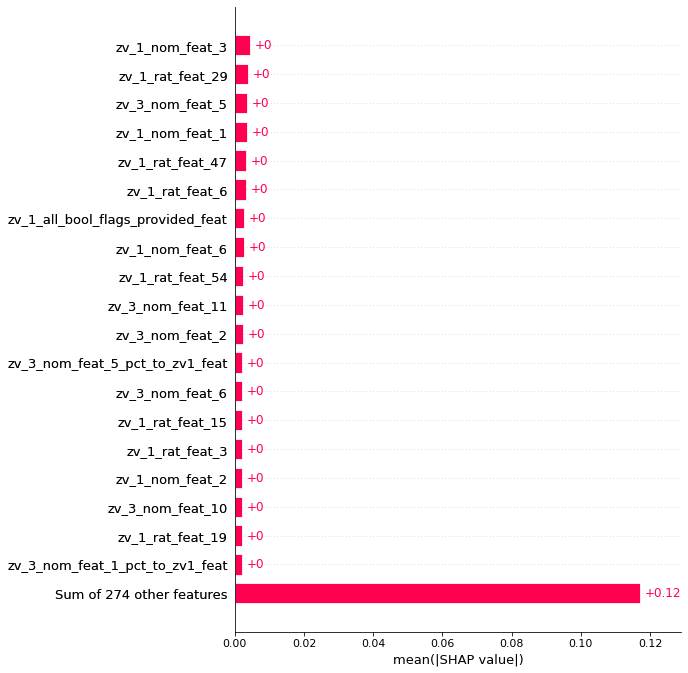

In [118]:
expl_transfer_random_forest.plot_global_bars(num_feat_shown=20)

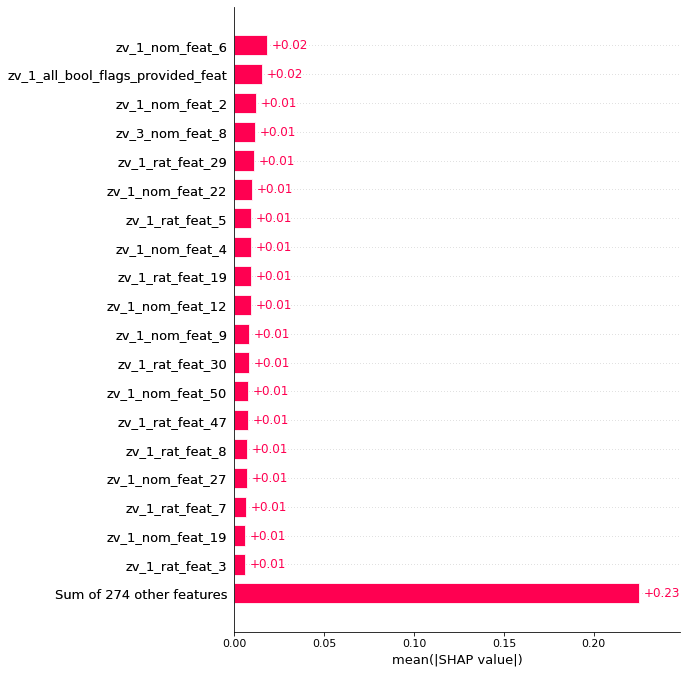

In [119]:
expl_transfer_xgb.plot_global_bars(num_feat_shown=20)

###### The global heatmap plot is computationally expensive and takes quite some time if the data set is big. Consider omitting it.

In [120]:
# expl.plot_global_heatmap(num_feat_shown=20)

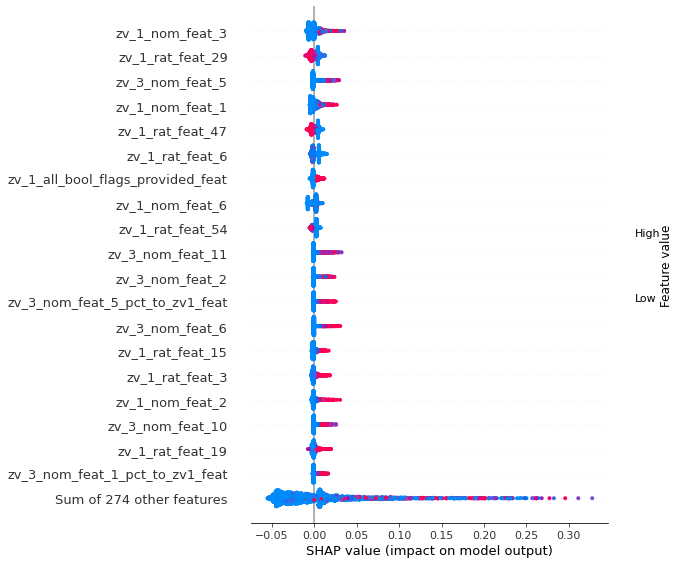

In [121]:
expl_transfer_random_forest.plot_global_beeswarm(num_feat_shown=20)

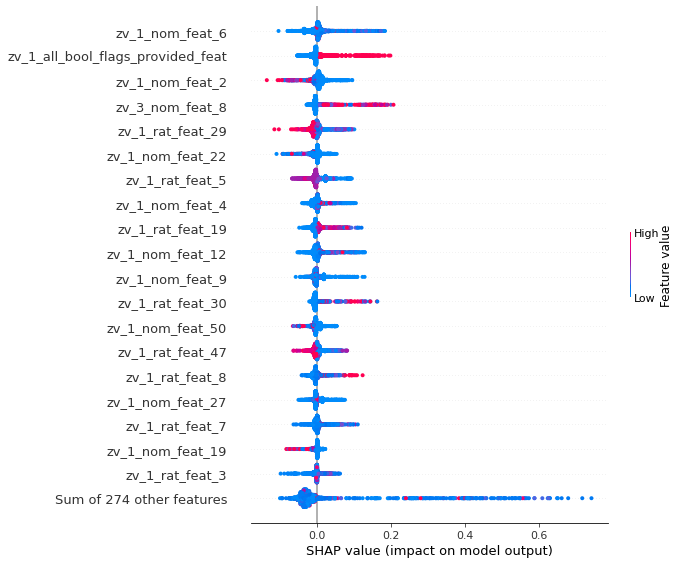

In [122]:
expl_transfer_xgb.plot_global_beeswarm(num_feat_shown=20)

###### Explanation data

In [123]:
# RandomForest
expl_transfer_random_forest.shap_explanation_data

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,2.122980e+06,2.932293e+05,2.267238e+06,3.495496e+05,4.390218e+06,6.427789e+05,1.550000e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
4,3.408176e+05,0.000000e+00,3.408176e+05,0.000000e+00,6.816353e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
8,0.000000e+00,1.415952e+05,4.441510e+03,1.370945e+05,4.441510e+03,2.786897e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
9,1.363437e+07,1.525828e+07,1.353701e+07,1.672236e+07,2.717138e+07,3.198064e+07,0.000000e+00,1.530000e+05,3.027000e+06,5.604000e+06,...,0.0,0,0.036720,1,0.004529,1,0.0,0,0.0,0
10,8.874268e+07,8.858702e+07,8.011018e+07,8.934721e+07,1.688529e+08,1.779342e+08,8.250000e+06,4.230000e+06,7.467500e+07,8.049300e+07,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,8.560439e+06,1.830682e+06,7.010563e+06,1.713451e+06,1.557100e+07,3.544133e+06,1.152000e+06,5.500000e+04,3.743000e+06,9.500000e+04,...,0.0,0,0.009844,1,0.015461,1,0.0,0,0.0,0
2701,1.940424e+07,2.781809e+07,1.952007e+07,2.622613e+07,3.892430e+07,5.404423e+07,1.486625e+07,2.454298e+07,1.384784e+07,2.316400e+07,...,0.0,0,0.000000,0,0.039382,1,0.0,0,0.0,0
2702,1.962219e+07,1.918395e+07,2.031671e+07,1.698979e+07,3.993890e+07,3.617375e+07,1.065093e+07,5.656374e+06,1.035670e+07,3.465213e+06,...,0.0,0,0.027830,1,0.000000,0,0.0,0,0.0,0
2703,1.185193e+07,1.269888e+07,1.424330e+07,1.296040e+07,2.609524e+07,2.565928e+07,2.892000e+06,1.110000e+06,1.959000e+06,4.010000e+05,...,0.0,0,0.005401,1,0.000000,0,0.0,0,0.0,0


In [124]:
expl_transfer_xgb.shap_explanation_data

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,2.951022e+07,1.215001e+07,2.962002e+07,1.205614e+07,5.913024e+07,2.420616e+07,9.400000e+04,1.500000e+04,4.230000e+05,0.000000e+00,...,0.0,0,0.004317,1,0.000000,0,0.0,0,0.0,0
2,8.811080e+03,8.730500e+02,1.125810e+04,1.078428e+04,2.006918e+04,1.165733e+04,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
3,1.865473e+07,1.333853e+07,8.780013e+06,9.657923e+06,2.743474e+07,2.299645e+07,3.000000e+03,1.500000e+04,5.000000e+05,2.800000e+06,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
4,3.245059e+05,5.389058e+05,8.801500e+02,1.061250e+03,3.253860e+05,5.399670e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
5,1.408030e+06,1.271948e+06,1.437616e+06,1.249238e+06,2.845647e+06,2.521186e+06,0.000000e+00,0.000000e+00,3.000000e+03,6.000000e+03,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0,0.000000,0,0.000000,0,0.0,0,0.0,0
2700,8.560439e+06,1.830682e+06,7.010563e+06,1.713451e+06,1.557100e+07,3.544133e+06,1.152000e+06,5.500000e+04,3.743000e+06,9.500000e+04,...,0.0,0,0.009844,1,0.015461,1,0.0,0,0.0,0
2701,1.940424e+07,2.781809e+07,1.952007e+07,2.622613e+07,3.892430e+07,5.404423e+07,1.486625e+07,2.454298e+07,1.384784e+07,2.316400e+07,...,0.0,0,0.000000,0,0.039382,1,0.0,0,0.0,0
2702,1.962219e+07,1.918395e+07,2.031671e+07,1.698979e+07,3.993890e+07,3.617375e+07,1.065093e+07,5.656374e+06,1.035670e+07,3.465213e+06,...,0.0,0,0.027830,1,0.000000,0,0.0,0,0.0,0


##### LOCAL (For individual data points / clients)

In [125]:
trans_key_list_1 = get_key_values_where_index_is_in_both_dataframes(df_one=trans_model_random_forest.X ,df_two=expl_transfer_random_forest.shap_explanation_data, key_in_df_one='orig_key_1')
tkv1 = trans_key_list_1[0]

trans_key_list_3 = get_key_values_where_index_is_in_both_dataframes(df_one=trans_model_xgb.X ,df_two=expl_transfer_xgb.shap_explanation_data, key_in_df_one='orig_key_1')
tkv3 = trans_key_list_3[0]

###### Individual feature contributions in a DataFrame:

In [126]:
expl_transfer_random_forest.get_local_shap_values_from_method(key_value=tkv1)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,-0.001333,-0.00086,0.003508,-0.001485,-0.000332,-0.000269,0.001342,-0.000204,-0.001145,0.000227,...,0.0,0.0,0.000039,-0.000015,-0.000016,0.000048,0.0,0.0,0.0,0.0


In [127]:
expl_transfer_xgb.get_local_shap_values_from_method(key_value=tkv3)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,0.00115,0.000473,0.01561,0.004229,0.003659,-0.004683,-0.003548,-0.00047,0.000779,-0.000127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
expl_transfer_random_forest.get_local_shap_values_from_global(key_value=tkv1)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,-0.001333,-0.00086,0.003508,-0.001485,-0.000332,-0.000269,0.001342,-0.000204,-0.001145,0.000227,...,0.0,0.0,0.000039,-0.000015,-0.000016,0.000048,0.0,0.0,0.0,0.0


In [129]:
expl_transfer_xgb.get_local_shap_values_from_global(key_value=tkv3)

,zv_1_nom_feat_5,zv_1_nom_feat_11,zv_1_nom_feat_6,zv_1_nom_feat_12,zv_1_nom_feat_4,zv_1_nom_feat_10,zv_1_nom_feat_17,zv_1_nom_feat_23,zv_1_nom_feat_18,zv_1_nom_feat_24,...,zv_3_nom_feat_34_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_34,zv_3_nom_feat_27_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_27,zv_3_nom_feat_36_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_36,zv_3_nom_feat_28_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_28,zv_3_nom_feat_37_pct_to_zv1_feat,flag_zv3_to_zv1_ratio_exists_for_nom_feat_37
1,0.00115,0.000473,0.01561,0.004229,0.003659,-0.004683,-0.003548,-0.00047,0.000779,-0.000127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### As previously stated, there is an issue with the local shap values as there is a difference between local shap values coming from global and local shap values coming from the method. With the "compare_local_shap_from_global_with_local_shap_from_method()-method", the difference can be shown. The error should be corrected in newer versions of shap.

In [130]:
expl_transfer_random_forest.compare_local_shap_from_global_with_local_shap_from_method(key_value=tkv1)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,1
zv_1_nom_feat_14,0.050874


In [131]:
expl_transfer_xgb.compare_local_shap_from_global_with_local_shap_from_method(key_value=tkv3)

The difference in shap-values between local_from_method and local_from_global is shown here.The SHAP-value for the following feature(s) should be higher(+)/lower(-) by this amount in the local_from_global-Plots: 


,1
zv_1_rat_feat_13,0.042487


##### F. PLOTS

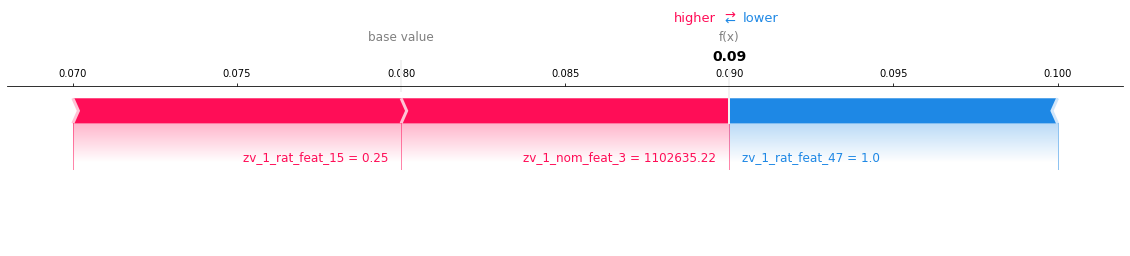

In [132]:
expl_transfer_random_forest.plot_local_force(key_value=tkv1)

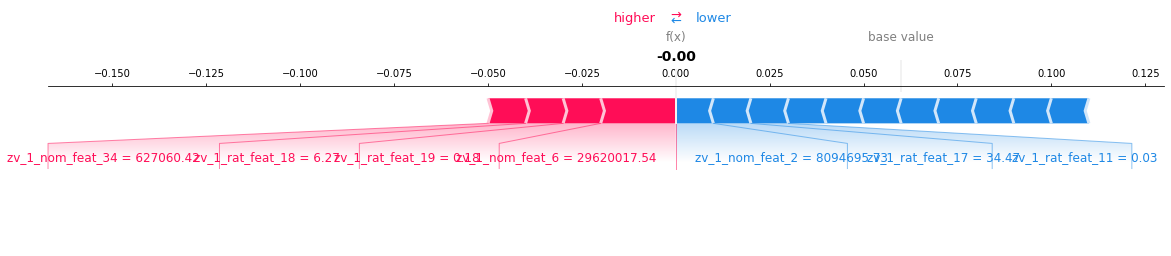

In [133]:
expl_transfer_xgb.plot_local_force(key_value=tkv3)

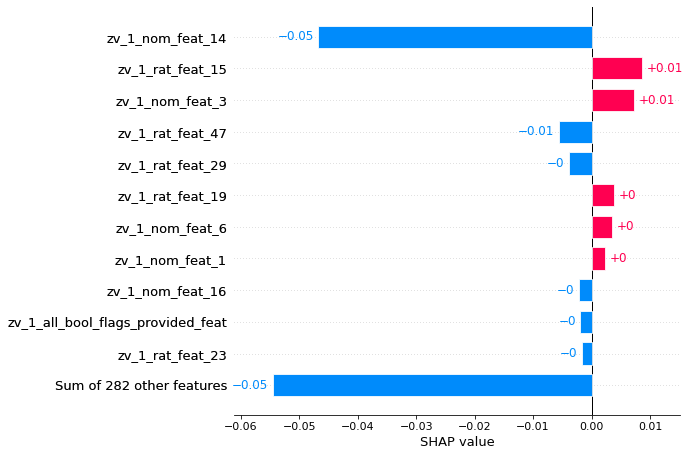

In [134]:
expl_transfer_random_forest.plot_local_bars_from_global(key_value=tkv1)

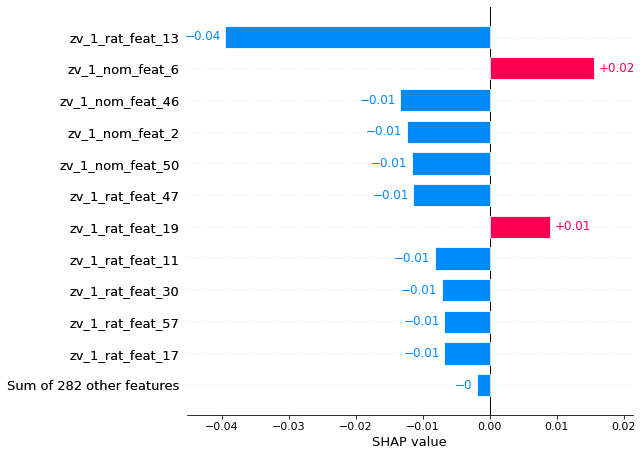

In [135]:
expl_transfer_xgb.plot_local_bars_from_global(key_value=tkv3)

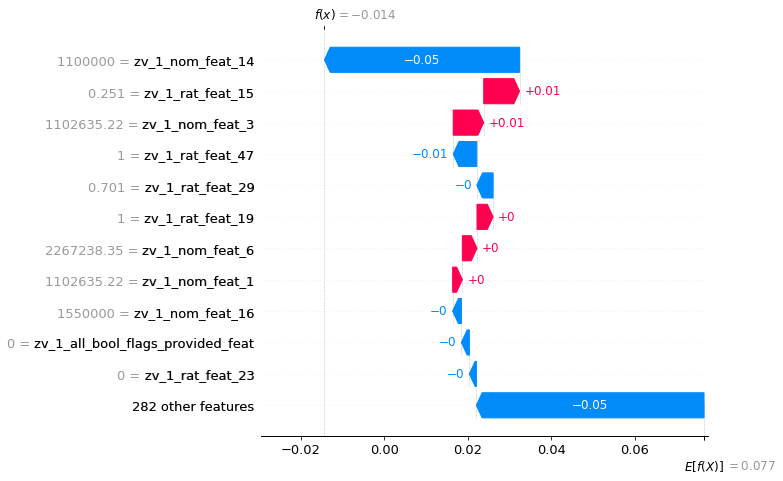

In [136]:
expl_transfer_random_forest.plot_local_waterfall_from_global(key_value=tkv1)

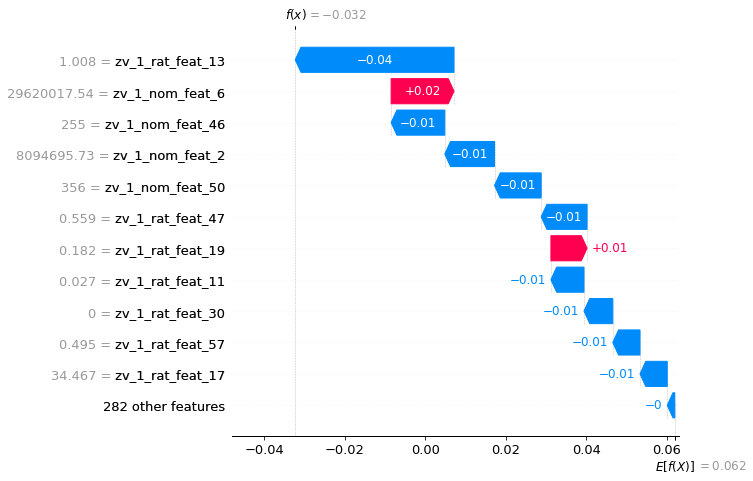

In [137]:
expl_transfer_xgb.plot_local_waterfall_from_global(key_value=tkv3)